In [17]:
import pandas as pd; import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import export_graphviz, plot_tree
from IPython.display import Image, display 
import pydotplus
pd.options.display.float_format = '{:,.3f}'.format
%matplotlib inline

In [20]:
url = ("https://raw.githubusercontent.com/DrSaadLa/PythonTuts/main/TreeBasedModels/breastcancer.csv")
br_can = pd.read_csv(url)
br_can.info()
print("-"*40, "\n")
br_can.head()
br_can.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   id                       569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,926424,21.560,22.390,142.000,"1,479.000",0.111,0.116,0.244,0.139,...,25.450,26.400,166.100,"2,027.000",0.141,0.211,0.411,0.222,0.206,0.071
565,M,926682,20.130,28.250,131.200,"1,261.000",0.098,0.103,0.144,0.098,...,23.690,38.250,155.000,"1,731.000",0.117,0.192,0.322,0.163,0.257,0.066
566,M,926954,16.600,28.080,108.300,858.100,0.085,0.102,0.093,0.053,...,18.980,34.120,126.700,"1,124.000",0.114,0.309,0.340,0.142,0.222,0.078
567,M,927241,20.600,29.330,140.100,"1,265.000",0.118,0.277,0.351,0.152,...,25.740,39.420,184.600,"1,821.000",0.165,0.868,0.939,0.265,0.409,0.124
568,B,92751,7.760,24.540,47.920,181.000,0.053,0.044,0.000,0.000,...,9.456,30.370,59.160,268.600,0.090,0.064,0.000,0.000,0.287,0.070


In [21]:
br_can.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.000,"30,371,831.432","125,020,585.612","8,670.000","869,218.000","906,024.000","8,813,129.000","911,320,502.000"
radius_mean,569.000,14.127,3.524,6.981,11.700,13.370,15.780,28.110
texture_mean,569.000,19.290,4.301,9.710,16.170,18.840,21.800,39.280
perimeter_mean,569.000,91.969,24.299,43.790,75.170,86.240,104.100,188.500
area_mean,569.000,654.889,351.914,143.500,420.300,551.100,782.700,"2,501.000"
smoothness_mean,569.000,0.096,0.014,0.053,0.086,0.096,0.105,0.163
compactness_mean,569.000,0.104,0.053,0.019,0.065,0.093,0.130,0.345
concavity_mean,569.000,0.089,0.080,0.000,0.030,0.062,0.131,0.427
concave points_mean,569.000,0.049,0.039,0.000,0.020,0.034,0.074,0.201
symmetry_mean,569.000,0.181,0.027,0.106,0.162,0.179,0.196,0.304


In [22]:
br_can.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

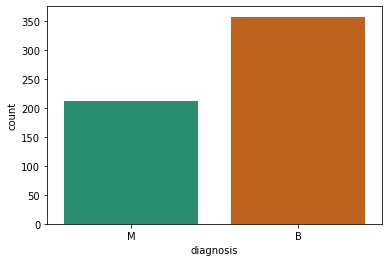

In [23]:
sns.countplot(x="diagnosis", data = br_can, palette='Dark2')
plt.show()

In [24]:
X = br_can.drop("diagnosis",axis=1)
y = br_can["diagnosis"]

In [25]:
br_can.isnull().sum()

diagnosis                  0
id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# encoding categorical data "diagnosis"
#from sklearn.preprocessing import LabelEncoder
#la_enc_y = LabelEncoder()
#la_enc_y.fit_transform(y)

In [26]:
X = br_can.drop("diagnosis",axis=1)
y = br_can["diagnosis"].replace({"B":0, "M":1}, inplace = True)
br_can.drop("id", axis = 1, inplace = True)
br_can.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.990,10.380,122.800,"1,001.000",0.118,0.278,0.300,0.147,0.242,...,25.380,17.330,184.600,"2,019.000",0.162,0.666,0.712,0.265,0.460,0.119
1,1,20.570,17.770,132.900,"1,326.000",0.085,0.079,0.087,0.070,0.181,...,24.990,23.410,158.800,"1,956.000",0.124,0.187,0.242,0.186,0.275,0.089
2,1,19.690,21.250,130.000,"1,203.000",0.110,0.160,0.197,0.128,0.207,...,23.570,25.530,152.500,"1,709.000",0.144,0.424,0.450,0.243,0.361,0.088
3,1,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,...,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,1,20.290,14.340,135.100,"1,297.000",0.100,0.133,0.198,0.104,0.181,...,22.540,16.670,152.200,"1,575.000",0.137,0.205,0.400,0.163,0.236,0.077


In [27]:
br_can.shape

(569, 31)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split
X = br_can.drop("diagnosis",axis=1)
y = br_can["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, 
                                                    random_state=32)

In [60]:
from sklearn.ensemble import RandomForestClassifier
r_f_cl = RandomForestClassifier(random_state = 32)
r_f_cl.fit(X_train, y_train)

RandomForestClassifier(random_state=32)

In [51]:
# random forest classification with cv
from sklearn.model_selection import cross_val_score, cross_val_predict
scores = cross_val_score (r_f_cl, X_train, y_train, scoring = "accuracy", cv= 10).mean()
print("*"*54)
print("the accuracy with 10 folds cross validation is %s" % round (scores* 100,2))
print("*"*54)

******************************************************
the accuracy with 10 folds cross validation is 96.05
******************************************************


In [38]:
# decision tree classification 
dt_cl = DecisionTreeClassifier(max_depth=3, 
                            random_state=32)
print(type(dt_cl), '\n')
dt_cl.fit(X_train, y_train)
pred = dt_cl.predict(X_test)
print("*"*54)
acr = accuracy_score(pred, y_test)
print("Test set accuracy: {:.2f}".format(acr))

print("*"*54)
print(confusion_matrix(y_test,pred), "\n")

print("*"*54)
print(classification_report(y_test,pred))
print("*"*54)

<class 'sklearn.tree._classes.DecisionTreeClassifier'> 

******************************************************
Test set accuracy: 0.92
******************************************************
[[66  4]
 [ 5 39]] 

******************************************************
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        70
           1       0.91      0.89      0.90        44

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114

******************************************************


In [52]:
##  KNneighbors classifier 
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
K = []
for i in range (1,16):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    K.append(i)
    
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
train_scores = knn_model.score(X_train, y_train)
test_scores = knn_model.score(X_test, y_test)
print("*"*54)
print("train_score", train_scores)
print("*"*54)
print("test_score", test_scores)
print("*"*54)
from sklearn import metrics
y_pred = knn.predict (X_test)
print("accuracy : ", metrics.accuracy_score(y_test, y_pred))
print("*"*54)

******************************************************
train_score 0.9516483516483516
******************************************************
test_score 0.8859649122807017
******************************************************
accuracy :  0.8859649122807017
******************************************************


In [54]:
## logistic Regression 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report
log_reg  = LogisticRegression(solver = "liblinear")
log_reg.fit(X_train, y_train)
y_pred =log_reg.predict(X_test)
print("*"*50)
print(confusion_matrix(y_test, y_pred))
print("*"*50)
print(classification_report(y_test, y_pred))
print("*"*50)

**************************************************
[[65  5]
 [ 5 39]]
**************************************************
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        70
           1       0.89      0.89      0.89        44

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

**************************************************


In [59]:
# ensemble classification 
from sklearn.ensemble import VotingClassifier
    
classifiers = [('Logistic Regression', log_reg), 
               ('K Nearest Neighbours', knn_model), 
               ('Classification Tree', dt_cl)]

vc = VotingClassifier(estimators=classifiers) 
for clf_name, clf in classifiers: 
                                vc.fit(X_train, y_train)   
                                y_pred = vc.predict(X_test)
                                accuracy = accuracy_score(y_pred, y_test)
print("*"*50)                
print('Voting Classifier: {:.3f}'.format(accuracy))
print("*"*50)

**************************************************
Voting Classifier: 0.921
**************************************************
